# Comparison of Numerical and Analytic 
This notebook uses data from the script `problem_b.py`. This data is (for the time being) in the folder "data".

In [2]:
# Getting out the toolbox
from matplotlib import pyplot as plt
import pickle
import seaborn as sns
import numpy as np

from IPython.core.pylabtools import figsize

In [2]:
# Seaborn
sns.set(color_codes=True)
figsize(24, 18)

In [3]:
# Importing data - this is not all, there is also cpu time
energies_analytic  = pickle.load(open("../data/energies_analytic2.p", "rb"))
energies_numerical = pickle.load(open("../data/energies_numerical2.p", "rb"))

So what do I have here? The structures are three-dimensional,
- First axis: no of partices, 1, 10, 100, 500
- Second axis: no of dimensions: 1, 2, 3
- Third axis: $\alpha$ value

In [6]:
num_particles = [1, 10, 100] #, 500]
dimensions = [1, 2, 3]

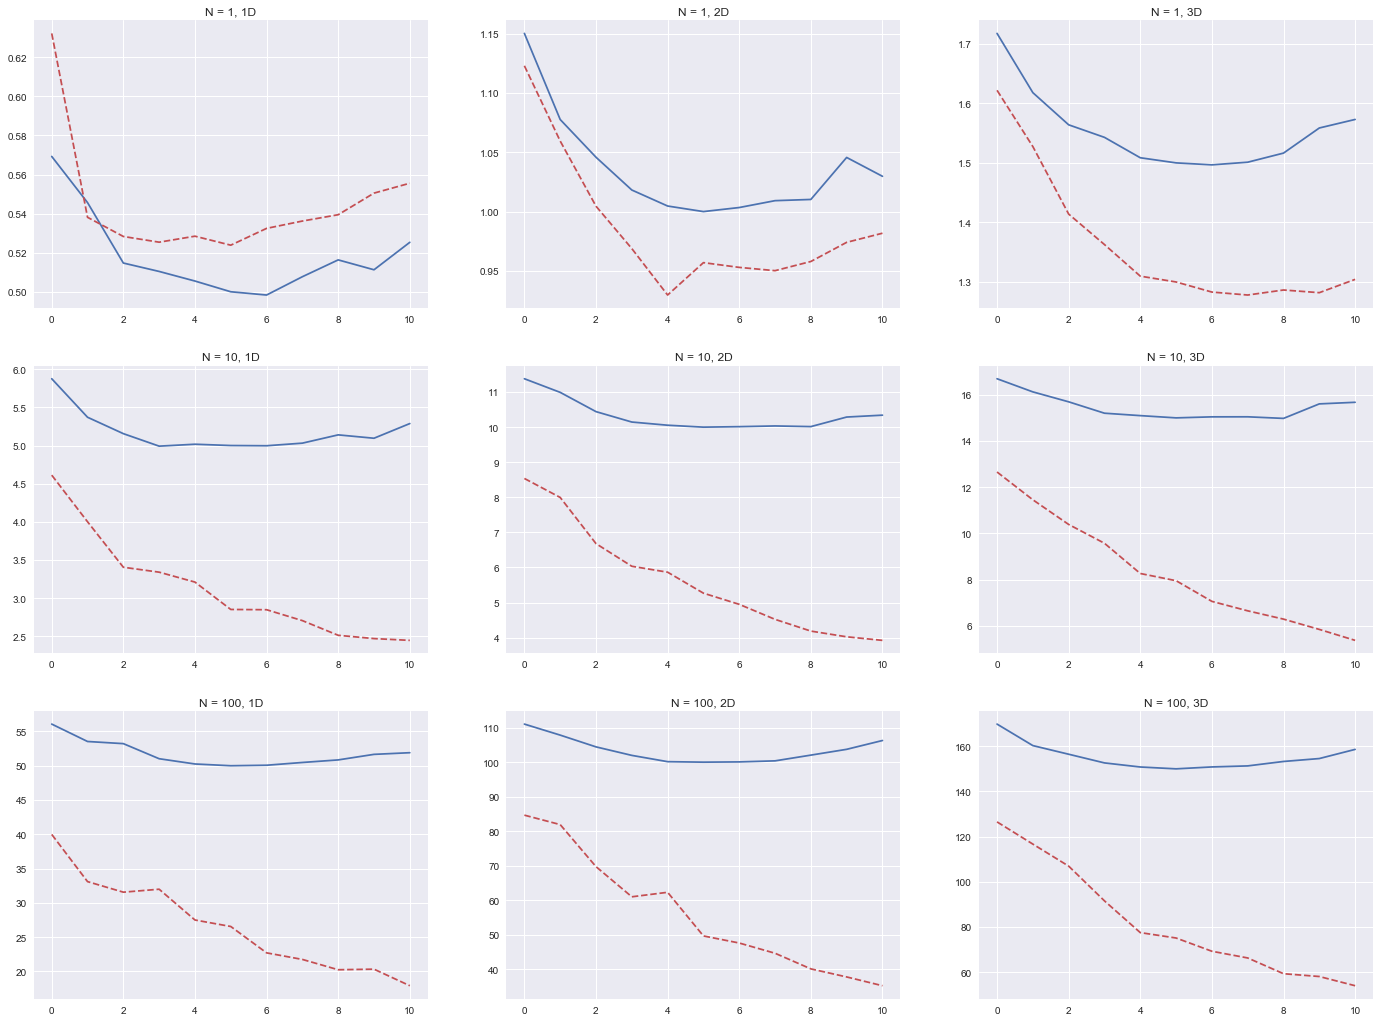

In [6]:
plot_no = 0
for i in range(len(num_particles)):
    for j in range(len(dimensions)):
        plot_no += 1
        plt.subplot(len(num_particles), len(dimensions), plot_no)
        plt.title("N = {}, {}D".format(num_particles[i], dimensions[j]))
        plt.plot(energies_analytic[i, j, :], '-b')
        plt.plot(energies_numerical[i, j, :], '--r')
        plt.plot()
        
plt.show()

## Conlusion (so far)
This all turned out horribly bad. But let's look at the bright side: at lease we have some kind of framework to get the plots from data. Bear in mind: $N = 500$ was not allowed to finish.

## How Long did it take??

In [11]:
cpu_time_numerical = pickle.load(open("../data/cpu_time_numerical2.p", "rb"))
for i in range(len(num_particles)):
    for j in range(len(dimensions)):
        print("N = {:4}, {:2}D".format(num_particles[i], dimensions[j]))
        print("Mean CPU time: {:9.5f} seconds\n".format(np.mean(cpu_time_numerical[i, j, :])))

N =    1,  1D
Mean CPU time:   0.22736 seconds

N =    1,  2D
Mean CPU time:   0.28222 seconds

N =    1,  3D
Mean CPU time:   0.33696 seconds

N =   10,  1D
Mean CPU time:   0.93013 seconds

N =   10,  2D
Mean CPU time:   2.02090 seconds

N =   10,  3D
Mean CPU time:   3.50017 seconds

N =  100,  1D
Mean CPU time:  33.81523 seconds

N =  100,  2D
Mean CPU time: 127.37914 seconds

N =  100,  3D
Mean CPU time: 490.16823 seconds

